**Question 1**

Matrix multiplication between a (n,k) matrix A and (k,m) matrix B matrix results in an (n,m) matrix C. Any element of the resultant matrix C, $c_{ij}$, can be calculated as $c_{ij} = \sum_{r=1}^{k} a_{ir} \cdot b_{rj}$. We are multiplying the k elements of the $i$th row of A with the k elements of the $j$th column of the B and we are adding all these products to get $c_{ij}$. For one element, we have k multiplications and to add k products we have k-1 additions.
Since the resulting matrix have $n \times m$ elements,
Total number of multiplications are $$n \times m \times k$$
 and total number of additions are $$n \times m \times (k - 1)$$





In [1]:
def matrix_multiplication(A , B):
  n=len(A)
  k=len(A[0])
  m=len(B[0])
  C=[]
  no_of_products=0
  no_of_additions=0
  for i in range(n):
    row=[]

    for j in range(m):
      for r in range(k):
        if len(row)==0:
          value=A[i][r]*B[r][j]
          no_of_products+=1
        else:
          value=value+(A[i][r]*B[r][j])
          no_of_products+=1
          no_of_additions+=1
      row.append(value)
    C.append(row)
  return no_of_products,no_of_additions
A = [
    [1, 4],
    [7, 9],
    [11, 22]
]

B = [
    [1, 2],
    [3, 4]
]
# n=3,k=2,m=2
#n X k X m = 12
#n X (k-1) X m = 6
p,a = matrix_multiplication(A, B)
print("Number of multiplications are",p)
print("Number of Additions are",a)


Number of multiplications are 12
Number of Additions are 6


**Question 2**


In [8]:
# Using list of lists

import time

def matrix_multiplication_list(A , B):
  n=len(A)
  k=len(A[0])
  m=len(B[0])
  C=[]
  for i in range(n):
    row=[]
    for j in range(m):
      value=0
      for r in range(k):
        value=value+(A[i][r]*B[r][j])
      row.append(value)
    C.append(row)
  return C
A = [
    [2, 4, 6],
    [8, 10, 12],
    [14, 16, 18]
]

B = [
    [1, 3, 5],
    [7, 9, 11],
    [13, 15, 17]
]
repeats=100
start_t=time.time()
for i in range(repeats):
  matrix= matrix_multiplication_list(A , B)
end_t=time.time()
time_taken=(end_t-start_t)/repeats
print(matrix)
print("Time taken using list of lists is",time_taken)

[[108, 132, 156], [234, 294, 354], [360, 456, 552]]
Time taken using list of lists is 5.297183990478516e-05


In [7]:
#Using Numpy
import numpy as np
A = [
    [2, 4, 6],
    [8, 10, 12],
    [14, 16, 18]
]

B = [
    [1, 3, 5],
    [7, 9, 11],
    [13, 15, 17]
]
matrix_A=np.array(A)
matrix_B=np.array(B)
repeats=100
start_t_np=time.time()
for i in range(repeats):
  matrix_c= np.dot(matrix_A , matrix_B)
end_t_np=time.time()
time_taken_np=(end_t_np-start_t_np)/repeats
print(matrix)
print("Time taken using numpy is",time_taken_np)

[[108, 132, 156], [234, 294, 354], [360, 456, 552]]
Time taken using numpy is 2.1576881408691406e-05


Numpy arrays contain elements of same datatype which eliminates the need to store type information for each element. This reduces the memory overhead that is present in lists. <br> Numpy arrays store data in contigious memory locations which allows efficient access to perform faster numerical computations. Whereas in lists are not stored in contigious memory blocks which causes inefficiency.<br> Numpy performs operations on entire array at once using a method called vectorisation, where instruction is followed at the same time at different datapoints.Numpy uses multiple cores of CPU to perform operations concurrently, by splitting larger tasks into smaler ones and performing parlleley.<br>Numpy operationns are implemented in c which makes it much faster than the python code.

**Question 3**

In [9]:
# Method 1 - repeated passing of list

import time

def find_lar(arr,k):
  arr_c=arr[:]
  for _ in range(k):
    max_value=max(arr_c)
    arr_c.remove(max_value)
  return max_value
def median(arr):
  n=len(arr)
  if n%2==0:
    m1=find_lar(arr,n//2)
    m2=find_lar(arr,n//2+1)
    return (m1+m2)/2
  else:
    return find_lar(arr,n//2+1)
arr = [12, 3, 5, 7, 19, 1, 2, 4, 6, 8, 9, 11, 10, 7, 5, 7]
repeats=100
start_time=time.time()
for _ in range(repeats):
  median(arr)
end_time=time.time()
time_taken_=(end_time-start_time)/repeats
print("Time taken by repeatedly passing the array is",time_taken_)




Time taken by repeatedly passing the array is 4.006624221801758e-05


In [10]:
# Method 2- first sorting the list and dirctly taking the median value
def find_median_sorting(arr):
  sorted_arr=sorted(arr)
  n=len(arr)
  if n%2==0:
    m1=sorted_arr[(n//2)-1]
    m2=sorted_arr[n//2]
    return (m1+m2)/2
  else:
    return sorted_arr[n//2]
repeats=100
s_t=time.time()
for _ in range(repeats):
  find_median_sorting(arr)
e_t=time.time()
time_=(e_t-s_t)/repeats
print("Time taken by sorting list and finding the median is",time_)

Time taken by sorting list and finding the median is 2.274513244628906e-06


In [25]:
# Using Numpy
import numpy as np

def find_median_numpy(arr):
    return np.median(arr)
repeats=100
start_time_np=time.time()
for i in range(repeats):
  find_median_numpy(arr)
end_time_np=time.time()
time_np=(end_time_np-start_time_np)/repeats
print("Time taken by using numpy is",time_np)

Time taken by using numpy is 4.985570907592774e-05


**Question 4**

The gradient of the function  $x^2 y + y^3 sin(x)$ with respect to x and y is $$ ∇ f(x,y) = \left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right)$$ $$\frac{\partial f}{\partial x} = 2 x y + y^3 cos(x) $$ $$ \frac{\partial f}{\partial y} = x^2 + 3 y^2 sin(x) $$ Therefore $$ ∇ f(x,y) =\left( 2 x y + y^3 cos(x), x^2 + 3 y^2 sin(x) \right)$$

In [26]:
import math
def f(x,y):
  return (pow(x,2)*y) + (pow(y,3)*math.sin(x))
def gradient_f(x,y):
  df_dx=(2*x*y)+(pow(y,3)*math.cos(x))
  df_dy=(pow(x,2))+(3*pow(y,2)*math.sin(x))
  return df_dx,df_dy
x = np.random.rand()
y = np.random.rand()
df_dx,df_dy=gradient_f(x,y)
print(f"Analytical gradient is ({df_dx},{df_dy})")


Analytical gradient is (0.013507683546562819,0.0030816020768691817)


**Question 5**

In [28]:
# Using Jax
import jax
import jax.numpy as jnp

def jax_f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)
def gradient_f_x_jax(x, y):
    return jax.grad(lambda x: jax_f(x, y))(x)


def gradient_f_y_jax(x, y):
    return jax.grad(lambda y: jax_f(x, y))(y)

grad_x = gradient_f_x_jax(x, y)
grad_y = gradient_f_y_jax(x, y)
print(f"JAX :gradient is ({grad_x }, {grad_y})")


JAX :gradient is (0.013507682830095291, 0.003081602044403553)


In [30]:
import sympy as sp
x_v, y_v = sp.symbols('x_v y_v')
f = pow(x_v,2) * y_v + pow(y_v,3) * sp.sin(x_v)
df_dx = sp.diff(f, x_v)
df_dy = sp.diff(f, y_v)
df_dx_val = df_dx.subs({x_v: x, y_v: y})
df_dy_val = df_dy.subs({x_v: x, y_v: y})
print(f"sympy: gradient is ({df_dx_val},{df_dy_val})")

sympy: gradient is (0.0135076835465628,0.00308160207686918)


**Question 7**

In [32]:
student_records={
    2022:{
        "Branch 1":{
            1:{
                "Roll Number":123,
                "Name":"name1",
                "Marks":{
                    "Maths":60,
                    "Science":100,
                    "English":70
                }
            },
            2:{
                "Roll Number":124,
                "Name":"name2",
                "Marks":{
                    "Maths":65,
                    "Science":100,
                    "English":70
              }
          }},
       "Branch 2":{
           1:{
                "Roll Number":125,
                "Name":"name3",
                "Marks":{
                    "Maths":60,
                    "Science":100,
                    "English":70
                }
          }}},
    2023:{
        "Branch 1":{
            1:{
                "Roll Number":126,
                "Name":"name4",
                "Marks":{
                    "Maths":60,
                    "Science":100,
                    "English":70
                }
            },
            2:{
                "Roll Number":127,
                "Name":"name5",
                "Marks":{
                    "Maths":65,
                    "Science":100,
                    "English":70
              }
          }},
       "Branch 2":{
           1:{
                "Roll Number":128,
                "Name":"name6",
                "Marks":{
                    "Maths":60,
                    "Science":100,
                    "English":70
                }
          }}},
    2024:{
        "Branch 1":{
            1:{
                "Roll Number":129,
                "Name":"name7",
                "Marks":{
                    "Maths":60,
                    "Science":100,
                    "English":70
                }
            },
            2:{
                "Roll Number":130,
                "Name":"name8",
                "Marks":{
                    "Maths":65,
                    "Science":100,
                    "English":70
              }
          }},
       "Branch 2":{
           1:{
                "Roll Number":131,
                "Name":"name9",
                "Marks":{
                    "Maths":60,
                    "Science":100,
                    "English":70
                }
          }}},
    2025:{
        "Branch 1":{
            1:{
                "Roll Number":132,
                "Name":"name10",
                "Marks":{
                    "Maths":60,
                    "Science":100,
                    "English":70
                }
            },
            2:{
                "Roll Number":133,
                "Name":"name11",
                "Marks":{
                    "Maths":65,
                    "Science":100,
                    "English":70
              }
          }},
       "Branch 2":{
           1:{
                "Roll Number":134,
                "Name":"name12",
                "Marks":{
                    "Maths":60,
                    "Science":100,
                    "English":70
                }
          }}}}

**Question 9**

Text(0.5, 1.0, 'Plot of $y=x$')

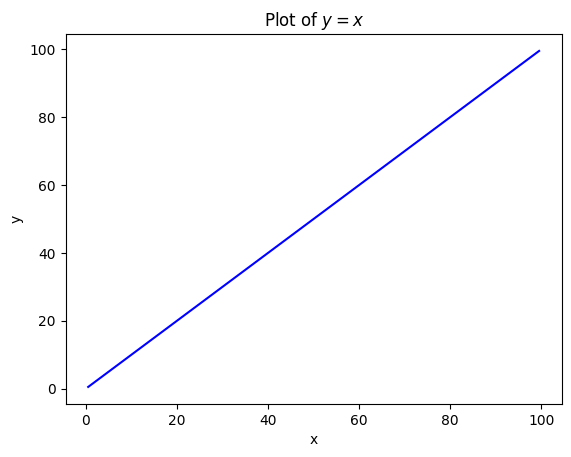

In [37]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0.5, 100.0, 0.5)
y1=x
plt.plot(x, y1, label='$y=x$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=x$')

Text(0.5, 1.0, 'Plot of $y=x^2$')

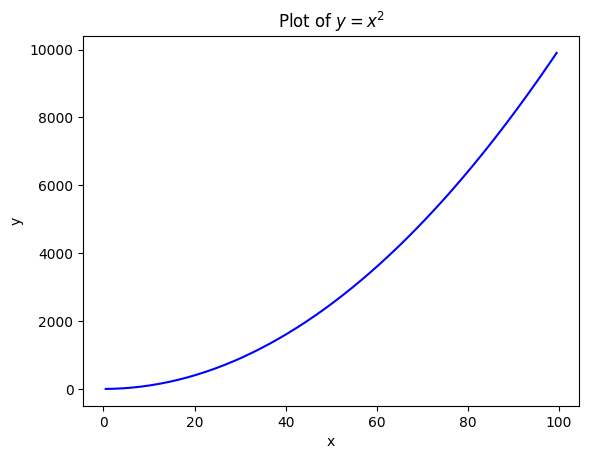

In [38]:
y2=pow(x,2)
plt.plot(x, y2, label='$y=x^2$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=x^2$')

Text(0.5, 1.0, 'Plot of $y=x^3/100$')

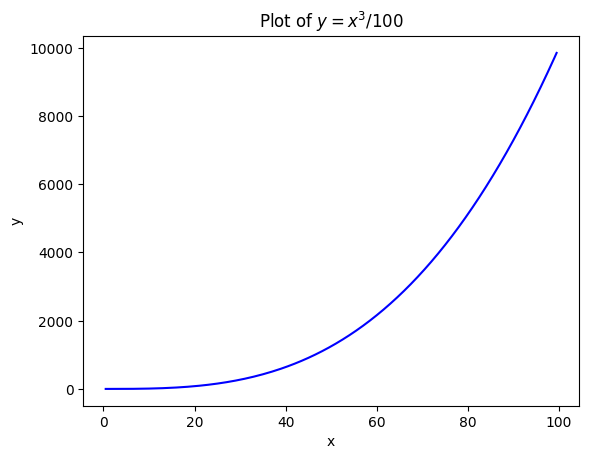

In [39]:
y3=pow(x,3)/100
plt.plot(x, y3, label='$y=x^3/100$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=x^3/100$')

Text(0.5, 1.0, 'Plot of $y=sin(x)$')

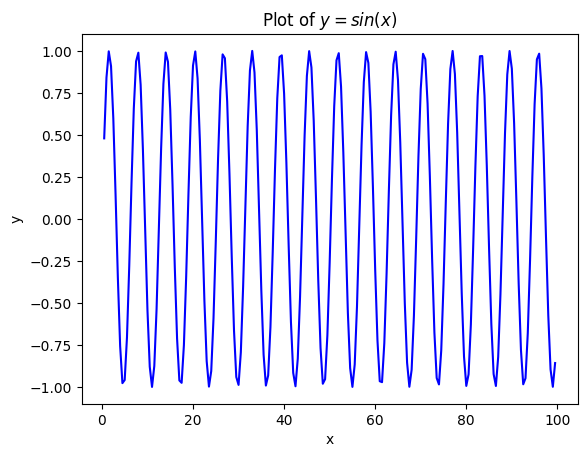

In [40]:
y4=np.sin(x)
plt.plot(x, y4, label='$y=sin(x)$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=sin(x)$')

Text(0.5, 1.0, 'Plot of $y=sin(x)/x$')

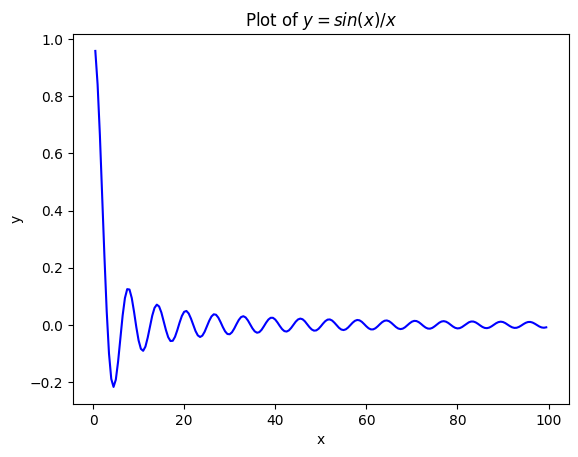

In [41]:
y5=(np.sin(x))/x
plt.plot(x, y5, label='$y=sin(x)/x$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=sin(x)/x$')

Text(0.5, 1.0, 'Plot of $y=log(x)$')

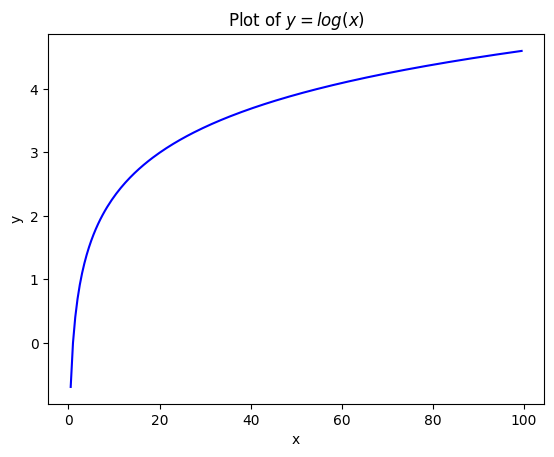

In [42]:
y6=np.log(x)
plt.plot(x, y6, label='$y=log(x)$', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y=log(x)$')

Text(0.5, 1.0, 'Plot of $y= e^x$')

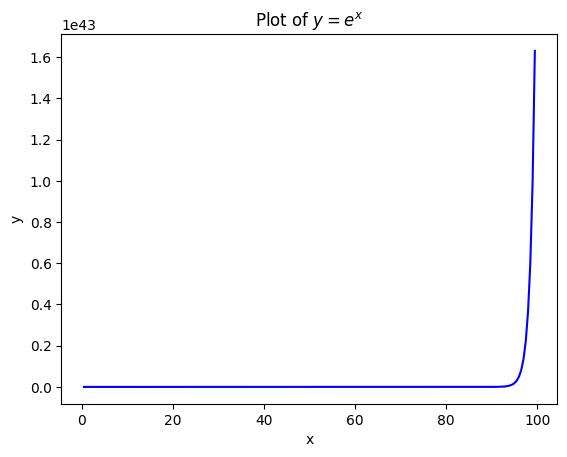

In [43]:
y7=np.exp(x)
plt.plot(x, y7, label='$y=e^x$', color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of $y= e^x$')

**Question 10**

In [75]:
import pandas as pd
import numpy as np
matrix = np.random.uniform(1, 2, size=(20, 5))
columns = ["a", "b", "c", "d", "e"]
df = pd.DataFrame(matrix, columns=columns)
std_dev=[]
for col in df.columns:
  std_dev.append(df[col].std())
maxstddev=max(std_dev)
maxstddev_index=std_dev.index(maxstddev)
maxstdcolumn=df.columns[maxstddev_index]
print(f"Column with the highest standard deviation: {maxstdcolumn}")

Column with the highest standard deviation: b


In [76]:
rowmeans=[]
n=len(df)
dataarray=df.values
for i in range(n):
  sum=0
  for j in range(dataarray.shape[1]):
        sum += dataarray[i, j]
  rowm = sum / dataarray.shape[1]
  rowmeans.append(rowm)
minmeanindex = rowmeans.index(min(rowmeans))
print(f"Row with the lowest mean: {minmeanindex}")


Row with the lowest mean: 18


**Question 11**

In [77]:
import pandas as pd
data = {
    'a': [1, 2, 3, 4, 5],
    'b': [5, 4, 3, 2, 1],
    'c': [1, 2, 1, 2, 1],
    'd': [2, 1, 2, 1, 2],
    'e': [3, 3, 3, 3, 3]
}

df = pd.DataFrame(data)
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)
g_values = []
for value in df['f']:
    if value < 8:
        g_values.append('LT8')
    else:
        g_values.append('GT8')
df['g'] = g_values
num_lt8 = df[df['g'] == 'LT8'].shape[0]
std_dev_lt8 = df[df['g'] == 'LT8']['f'].std()
std_dev_gt8 = df[df['g'] == 'GT8']['f'].std()
print(f"Number of rows where 'g' is 'LT8': {num_lt8}")
print(f"Standard deviation of 'f' where 'g' is 'LT8': {std_dev_lt8}")
print(f"Standard deviation of 'f' where 'g' is 'GT8': {std_dev_gt8}")

Number of rows where 'g' is 'LT8': 0
Standard deviation of 'f' where 'g' is 'LT8': nan
Standard deviation of 'f' where 'g' is 'GT8': 0.0


**Question 12**

In [78]:
import numpy as np

array_1 = np.array([2, 2, 3])
array_2 = np.array([[10], [20], [3]])
result = array_1 + array_2
print("1D Array:")
print(array_1)
print("2D Array:")
print(array_2)
print("Result of Broadcasting:")
print(result)

1D Array:
[2 2 3]
2D Array:
[[10]
 [20]
 [ 3]]
Result of Broadcasting:
[[12 12 13]
 [22 22 23]
 [ 5  5  6]]


**Question 13**

In [79]:
def min_of_arr(arr):
  min_index=0
  for i in range(len(arr)):
    if arr[i]<arr[min_index]:
      min_index=i
  return min_index
array = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5])
func_min_index=min_of_arr(array)
numpy_argmin = np.argmin(array)
print(f"Minimum value index of array using function: {func_min_index}")
print(f"Numpy argmin function: {numpy_argmin}")


Minimum value index of array using function: 1
Numpy argmin function: 1
